In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from scipy.optimize import curve_fit

sns.set_context('poster')
sns.set_style("ticks")
sns.set_palette("colorblind")

def line(x,m,b):
    return (m*x) + b
    

def read_QDP(file):
#     Takes in a file and returns an array with the QDP data
    data = [[]]
    i = 0
    j = 0
    for line in file:
        if i >2:
            temp = line.split()
            if temp[0] != 'NO':
                if temp[-1]=='NO':
                    temp = temp[:-1]
                data[-1].append(temp)
            else:
                data.append([])
        i += 1
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float).T
    return data

In [5]:
file_eeufspec = open('/Volumes/LaCie/AstroData/J1739-285/nustar/sim_states_fitting/tbabs_diskbb_bb_relxillNS_eeufspec.qdp', 'r')
file_chi = open('/Volumes/LaCie/AstroData/J1739-285/nustar/sim_states_fitting/tbabs_diskbb_bb_relxillNS_chi.qdp', 'r')
file_ratio = open('/Volumes/LaCie/AstroData/J1739-285/nustar/sim_states_fitting/tbabs_diskbb_bb_relxillNS_ratio.qdp', 'r')
file_model = open('/Volumes/LaCie/AstroData/J1739-285/nustar/sim_states_fitting/tbabs_diskbb_bb_relxillNS_model.qdp', 'r')

data_eeufspec = read_QDP(file_eeufspec)
data_chi = read_QDP(file_chi)
data_ratio = read_QDP(file_ratio)
data_model = read_QDP(file_model)

# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
plt.figure(figsize=(15,8))
lw = 1.5
# ls = 'steps'
ls=''
for i in range(len(data_sim)):
    if not i:
        plt.errorbar(data_sim[i][0],data_sim[i][2], xerr=data_sim[i][1], yerr=data_sim[i][3], \
                     ls=ls, color='C' + str(i), lw=lw)
    else:
        plt.errorbar(data_sim[i][0],data_sim[i][2], xerr=data_sim[i][1], yerr=data_sim[i][3], \
                     ls=ls, color='C' + str(i), lw=lw, label='0792382701')

for i in range(len(data_pl)):
    plt.errorbar(data_pl[i][0],data_pl[i][2], xerr=data_pl[i][1], yerr=data_pl[i][3], \
                 ls =ls, color='C' + str(int(len(data_sim) + i)), lw=lw, label='0780950201')

for i in range(len(data_high)):
    plt.errorbar(data_high[i][0],data_high[i][2], xerr=data_high[i][1], yerr=data_high[i][3], \
                 ls =ls, color='magenta', lw=lw, label='0824450301')
    
plt.legend(title='XMM OBSID', title_fontsize=20)
plt.loglog()
plt.xlabel('Energy (keV)')
plt.ylabel(r'$\mathrm{EF_E\ [keV^{2}(\gamma\,cm^{-2}\,s^{-1}\,keV^{-1})]}$')
plt.tight_layout()
plt.savefig('/Users/sean/Desktop/CircinusULX5/spectral_var.pdf')



NameError: name 'data_sim' is not defined

<Figure size 1080x576 with 0 Axes>

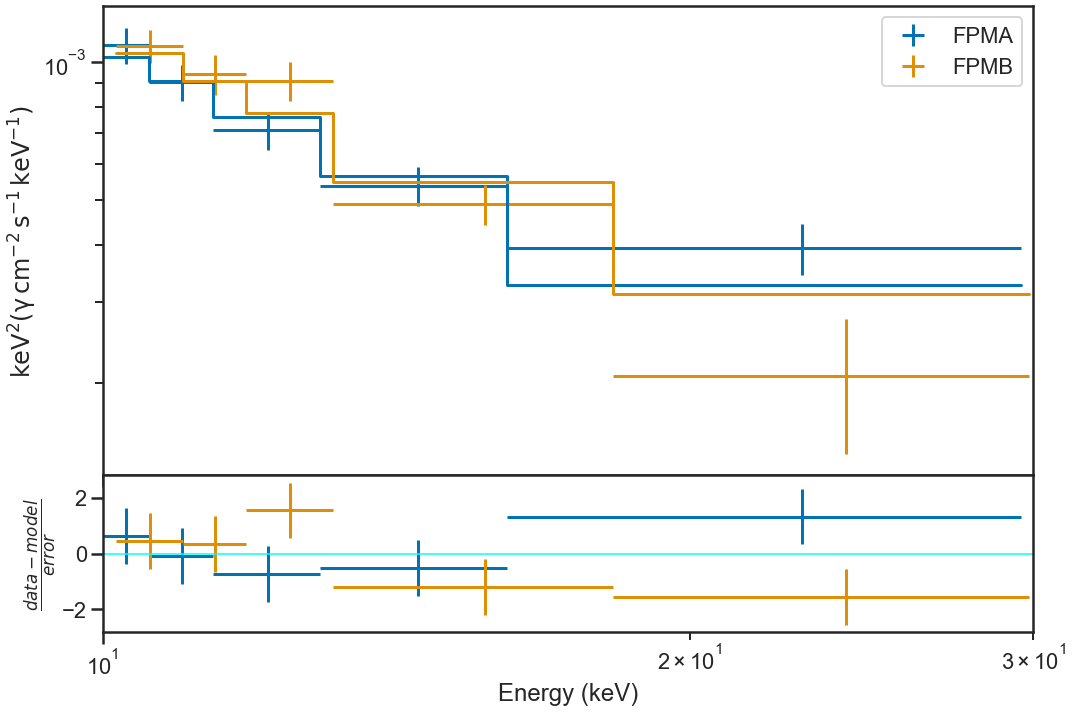

In [60]:
file_real = open('/Volumes/LaCie/AstroData/Circinus_ULX5/nustar/stacked_spectra/real_spectra_summed_eeufspec.qdp', 'r')
file_fake = open('/Volumes/LaCie/AstroData/Circinus_ULX5/nustar/stacked_spectra/fake_spectra_summed_eeufspec.qdp', 'r')

file_chi_real = open('/Volumes/LaCie/AstroData/Circinus_ULX5/nustar/stacked_spectra/real_chi_ldata.qdp', 'r')
file_chi_fake = open('/Volumes/LaCie/AstroData/Circinus_ULX5/nustar/stacked_spectra/fake_chi_ldata.qdp', 'r')


data_real = read_QDP(file_real)
data_fake = read_QDP(file_fake)
chi_real = read_QDP(file_chi_real)
chi_fake = read_QDP(file_chi_fake)

labels = ['FPMA', 'FPMB']
# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[3, 1], 'hspace':0}, figsize=(15, 10))
lw = 3.0
# ls = 'steps'
ls=''
for i in range(len(data_real)):
    ax1.errorbar(data_real[i][0], data_real[i][2], xerr=data_real[i][1], yerr=data_real[i][3], \
                 ls=ls, color='C' + str(i), lw=lw, label=labels[i])
    ax1.step(np.concatenate([data_real[i][0] - data_real[i][1],[data_real[i][0][-1] + data_real[i][1][-1]]]),\
             np.concatenate([data_real[i][4],[data_real[i][4][-1]]]) , color='C' + str(i), where='post', lw = lw)
    ax2.errorbar(data_real[i][0], (data_real[i][2]-data_real[i][4])/data_real[i][3], xerr=data_real[i][1], yerr=1.0, \
                 ls=ls, color='C' + str(i), lw=lw)

ax2.axhline(0.0,color='cyan', lw=1.5)
ax1.legend()
plt.xlim((10,30))
ax1.loglog()
# ax1.set_ylim((ax1.get_ylim()[0], 1e-3))
ax2.set_ylabel(r'$\frac{data-model}{error}$')
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{keV^{2}(\gamma\,cm^{-2}\,s^{-1}\,keV^{-1})}$')
plt.tight_layout()
plt.savefig('/Users/sean/Desktop/CircinusULX5/2020/stacked_real_spec.pdf')




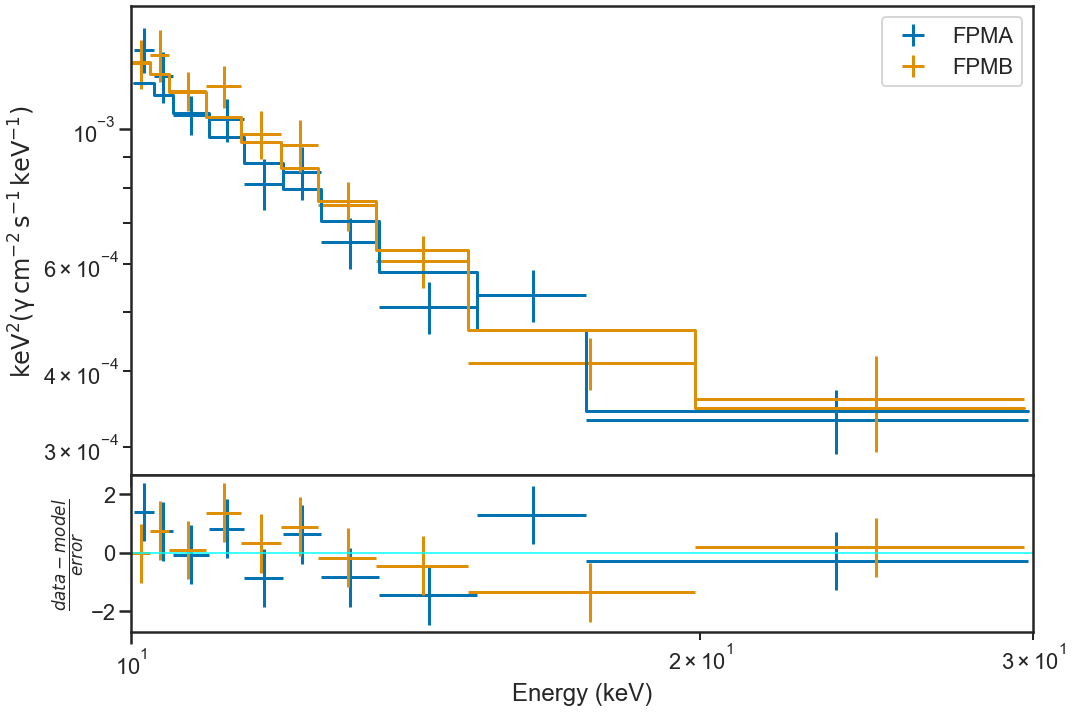

In [61]:
labels = ['FPMA', 'FPMB']
# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[3, 1], 'hspace':0}, figsize=(15, 10))
lw = 3.0
# ls = 'steps'
ls=''
for i in range(len(data_fake)):
    ax1.errorbar(data_fake[i][0], data_fake[i][2], xerr=data_fake[i][1], yerr=data_fake[i][3], \
                 ls=ls, color='C' + str(i), lw=lw, label=labels[i])
    ax1.step(np.concatenate([data_fake[i][0] - data_fake[i][1],[data_fake[i][0][-1] + data_fake[i][1][-1]]]),\
             np.concatenate([data_fake[i][4],[data_fake[i][4][-1]]]) , color='C' + str(i), where='post', lw = lw)
    ax2.errorbar(data_fake[i][0], (data_fake[i][2]-data_fake[i][4])/data_fake[i][3], xerr=data_fake[i][1], yerr=1.0, \
                 ls=ls, color='C' + str(i), lw=lw)
ax2.axhline(0.0,color='cyan', lw=1.5)
ax1.legend()
plt.xlim((10,30))
ax1.loglog()
ax2.set_ylabel(r'$\frac{data-model}{error}$')
# ax1.set_ylim((ax1.get_ylim()[0], 1.5e-3))
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{keV^{2}(\gamma\,cm^{-2}\,s^{-1}\,keV^{-1})}$')
plt.tight_layout()
plt.savefig('/Users/sean/Desktop/CircinusULX5/2020/stacked_fake_spec.pdf')



[]

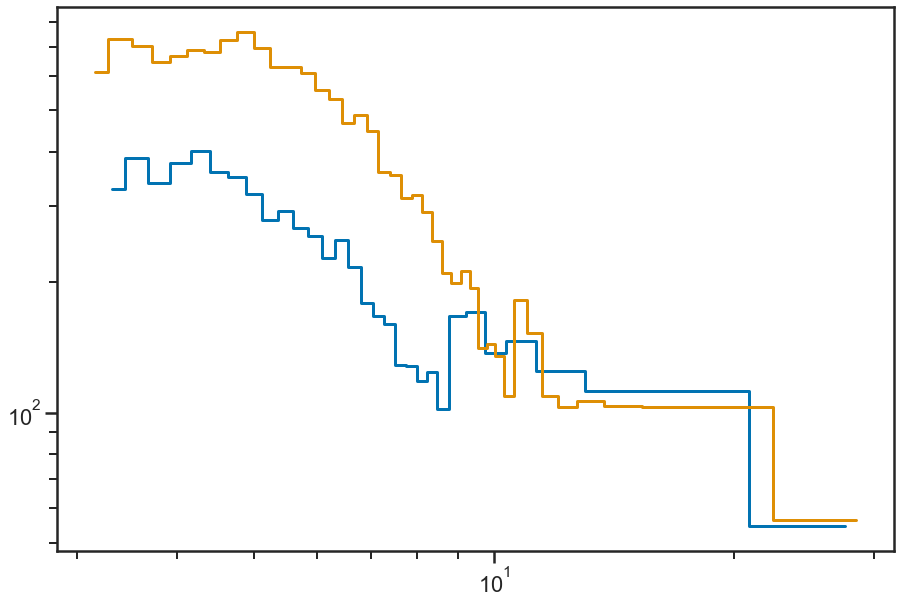

In [35]:
y_sigma_real = [np.square(data_real[i][2]/data_real[i][3]) for i in [0,1]]
y_sigma_fake = [np.square(data_fake[i][2]/data_fake[i][3])for i in [0,1]]
plt.figure(figsize=(15,10))
plt.step(data_real[0][0], y_sigma_real[0], where='mid')
plt.step(data_fake[0][0], y_sigma_fake[0], where='mid')
# plt.xscale('log')
plt.loglog()

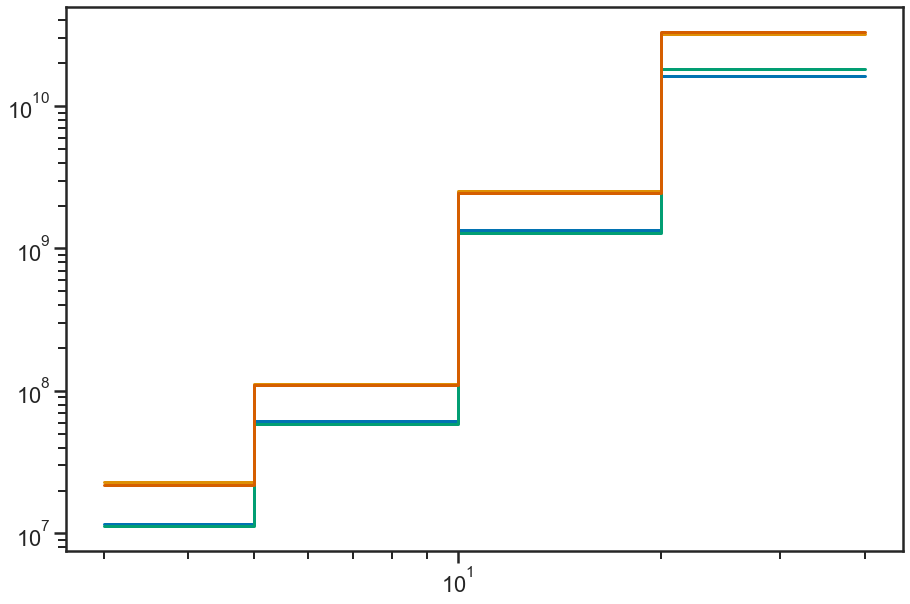

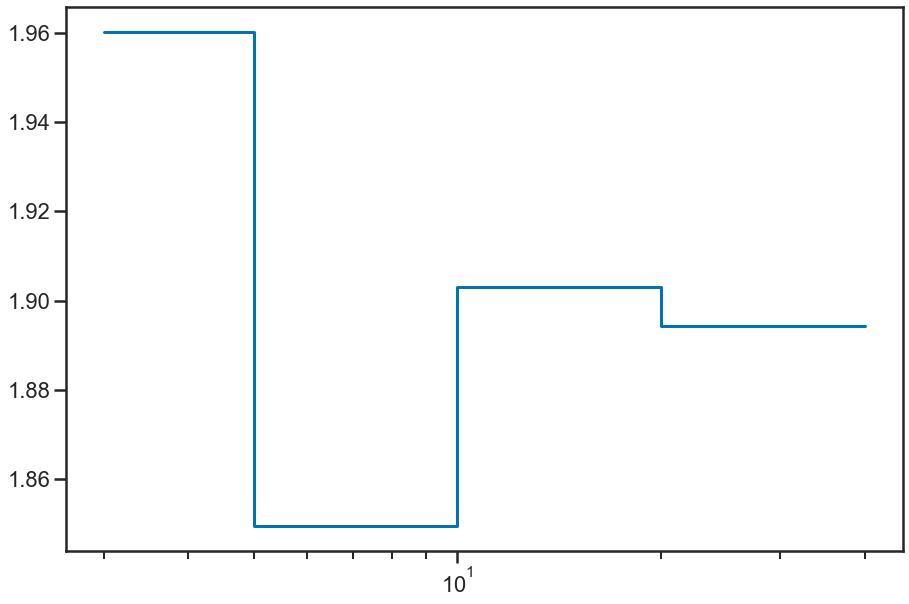

In [45]:
plt.figure(figsize=(15,10))
for i in [0,1]:
    plt.step(np.concatenate([chi_real[i][0] - chi_real[i][1],[chi_real[i][0][-1] + chi_real[i][1][-1]]]),\
             1.0/np.square(np.concatenate([chi_real[i][3],[chi_real[i][3][-1]]])) , where='post', lw = lw)
    plt.step(np.concatenate([chi_fake[i][0] - chi_fake[i][1],[chi_fake[i][0][-1] + chi_fake[i][1][-1]]]),\
             1.0/np.square(np.concatenate([chi_fake[i][3],[chi_fake[i][3][-1]]])) ,  where='post', lw = lw)
    
plt.loglog()

chi_real_tot = np.sqrt(np.square(chi_real[0][3]) + np.square(chi_real[1][3]))
chi_fake_tot = np.sqrt(np.square(chi_fake[0][3]) + np.square(chi_fake[1][3]))
plt.figure(figsize=(15,10))
plt.step(np.concatenate([chi_real[0][0] - chi_real[0][1],[chi_real[0][0][-1] + chi_real[0][1][-1]]]),\
         np.square(np.concatenate([chi_real_tot,[chi_real_tot[-1]]])/np.concatenate([chi_fake_tot,[chi_fake_tot[-1]]])) , where='post', lw = lw)
    
plt.xscale('log')
    

In [46]:
print(chi_real)
print(chi_fake)

print(np.square(chi_real[0][3])/chi_real[0][2])

[array([[4.00000000e+00, 7.50000000e+00, 1.50000000e+01, 3.00000000e+01],
       [1.00000000e+00, 2.50000000e+00, 5.00000000e+00, 1.00000000e+01],
       [1.60008632e-02, 7.53672374e-03, 6.18111284e-04, 2.42784627e-05],
       [2.93993042e-04, 1.27913139e-04, 2.72854613e-05, 7.82608004e-06]]), array([[4.00000000e+00, 7.50000000e+00, 1.50000000e+01, 3.00000000e+01],
       [1.00000000e+00, 2.50000000e+00, 5.00000000e+00, 1.00000000e+01],
       [1.61930397e-02, 7.69467605e-03, 6.17624202e-04, 9.80451205e-06],
       [2.97868217e-04, 1.30369182e-04, 2.79367105e-05, 7.39938605e-06]])]
[array([[4.00000000e+00, 7.50000000e+00, 1.50000000e+01, 3.00000000e+01],
       [1.00000000e+00, 2.50000000e+00, 5.00000000e+00, 1.00000000e+01],
       [1.66180693e-02, 8.44506361e-03, 6.73280971e-04, 2.89294021e-05],
       [2.09140213e-04, 9.42670449e-05, 1.98299458e-05, 5.57258136e-06]]), array([[4.00000000e+00, 7.50000000e+00, 1.50000000e+01, 3.00000000e+01],
       [1.00000000e+00, 2.50000000e+00, 5.0

In [ ]:
plt.step(chi_real[0][0], chi_real[0][3])